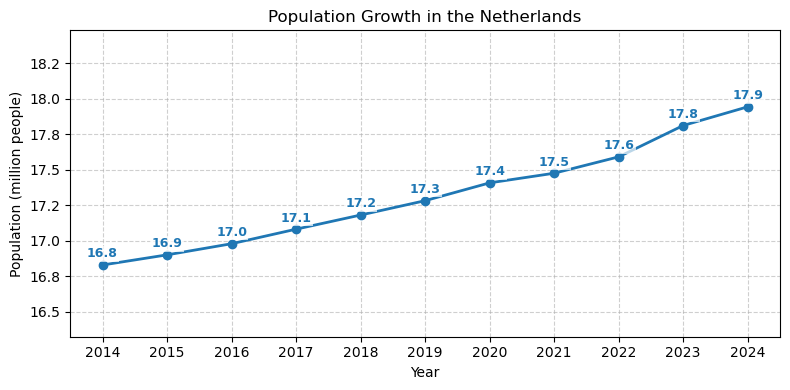

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# === 1. Data inlezen ===
df = pd.read_csv('bontwikkeling.csv', sep=';', skiprows=3)

# Kolomnamen opschonen
df.columns = df.columns.str.strip()
df = df.rename(columns={
    'Unnamed: 0': 'Year',
    'Bevolking aan het begin van de periode': 'Population'
})

# Alleen numerieke rijen behouden
df = df[pd.to_numeric(df['Population'], errors='coerce').notna()]

# Omzetten naar numeriek
df['Year'] = df['Year'].astype(int)
df['Population'] = df['Population'].astype(int) / 1_000_000  # in miljoenen

# === 2. Plot met uniforme Warentuin-/mobiliteitsstijl ===
plt.figure(figsize=(8, 4))
ax = plt.gca()

# Lijn en markers
ax.plot(df['Year'], df['Population'],
        marker='o', color='tab:blue', linewidth=2)

# Titel en labels
ax.set_title("Population Growth in the Netherlands")
ax.set_xlabel("Year")
ax.set_ylabel("Population (million people)")

# Grid en asopmaak
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_xticks(df['Year'])
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))

# Strakkere schaal (±3% marge)
ymin, ymax = df['Population'].min() * 0.97, df['Population'].max() * 1.03
ax.set_ylim(ymin, ymax)

# Labels bij datapunten
for x, y in zip(df['Year'], df['Population']):
    ax.text(
        x, y + (ymax - ymin) * 0.015,
        f"{y:.1f}",
        ha='center', va='bottom',
        fontsize=9, fontweight='bold',
        color='tab:blue',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=1)
    )

plt.tight_layout()
plt.show()





